In [1]:
!pip install nltk

import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lematizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

spam_data = pd.read_csv('spam.csv', encoding='latin-1')

print("\nLoaded Data : \n -----------------------------------")
print(spam_data.head())

spam_classes_raw = spam_data['v1']
spam_messages = spam_data['v2']


Loaded Data : 
 -----------------------------------
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [4]:
import nltk
import tensorflow as tf

def customtokenize(str):
    tokens = nltk.word_tokenize(str)
    nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
    lemmatized = [lematizer.lemmatize(word) for word in nostop]
    return lemmatized

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=customtokenize)

tfidf=vectorizer.fit_transform(spam_messages)
tfidf_array = tfidf.toarray()

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
spam_classes = label_encoder.fit_transform(spam_classes_raw)
spam_classes = tf.keras.utils.to_categorical(spam_classes,2)

print("TF-IDF Matrix Shape: " , tfidf.shape)
print("one-hot Encoding shape: ", spam_classes.shape)

X_train, X_test, y_train, y_test = train_test_split(tfidf_array, spam_classes, test_size=0.10)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF Matrix Shape:  (5572, 8835)
one-hot Encoding shape:  (5572, 2)


In [7]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2 #l2 for overfitting problem

NB_CLASSES=2
N_HIDDEN=32

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, input_shape=(X_train.shape[1],), name='Hidden-Layer-1', activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, name='Hidden-Layer-2', activation='relu'))
model.add(keras.layers.Dense(NB_CLASSES, name='Output-Layer', activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 32)             │       282,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283,874 (1.08 MB)

 Trainable params: 283,874 (1.08 MB)

 Non-trainable params: 0 (0.00 B)


Training Progress:
--------------------------
Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 2.1551e-05 - val_accuracy: 0.9811 - val_loss: 0.1041
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 2.3897e-05 - val_accuracy: 0.9811 - val_loss: 0.1046
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 2.1997e-05 - val_accuracy: 0.9811 - val_loss: 0.1043
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 1.9644e-05 - val_accuracy: 0.9811 - val_loss: 0.1041
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 2.2326e-05 - val_accuracy: 0.9811 - val_loss: 0.1051
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 2.1160e-05 - val_accuracy: 0.9811 - val_loss: 0.1054
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 2.1836e-05 - val_accuracy: 0.9811 - val_loss: 0.1046
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━

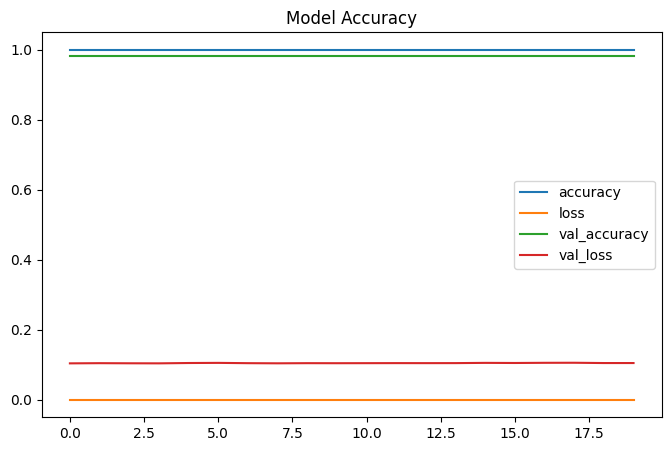


Evaluation against test Dataset:
--------------------------
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9826 - loss: 0.0823


[0.09488135576248169, 0.9838709831237793]

In [12]:
from re import VERBOSE
VERBOSE=1 #will tell how much the training process is done
BATCH_SIZE=256
EPOCHS=20 #will tell how much of processing
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n--------------------------")

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

print("\nAccuracy during training :\n--------------------------")
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title('Model Accuracy')
plt.show()

print("\nEvaluation against test Dataset:\n--------------------------")
model.evaluate(X_test, y_test)


In [13]:
predict_tfidf=vectorizer.transform(["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005",
                                    "Yup I will come over"]).toarray()
print(predict_tfidf.shape)
prediction=np.argmax(model.predict(predict_tfidf), axis=-1)
print("OUTPUT:", prediction)
print("CLASSES:", label_encoder.inverse_transform(prediction))

(2, 8835)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
OUTPUT: [1 0]
CLASSES: ['spam' 'ham']
